In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras import layers, models

# Load datasets
train_feat = np.load("datasets/train/train_feature.npz", allow_pickle=True)
train_feat_X = train_feat['features']
train_feat_Y = train_feat['label']
valid_feat = np.load("datasets/valid/valid_feature.npz", allow_pickle=True)
valid_feat_X = valid_feat['features']
valid_feat_Y = valid_feat['label']

test_feat = np.load("datasets/test/test_feature.npz", allow_pickle=True)
test_feat_X = test_feat['features']
percentages = [0.2, 0.4, 0.6, 0.8, 1.0]

def evaluate_LR(train_feat_X_method, valid_feat_X_method, method_name):
    accuracies = []
    for percentage in percentages:
        n_samples = int(len(train_feat_X_method) * percentage)
        x_train_subset = train_feat_X_method[:n_samples]
        y_train_subset = train_feat_Y[:n_samples]
        LR_classifier = LogisticRegression(random_state=42)
        LR_classifier.fit(x_train_subset, y_train_subset)

        # Predict on the validation set
        y_pred = LR_classifier.predict(valid_feat_X_method)

        # Calculate accuracy
        accuracy = accuracy_score(valid_feat_Y, y_pred)
        accuracies.append(accuracy)
        print(f"Accuracy ({method_name}) with {int(percentage*100)}% training data: {accuracy:.2f}")
    
    return accuracies
# Concatenation of Embeddings
train_feat_X_concat = train_feat_X.reshape(train_feat_X.shape[0], -1)
valid_feat_X_concat = valid_feat_X.reshape(valid_feat_X.shape[0], -1)
accuracies_concat = evaluate_LR(train_feat_X_concat, valid_feat_X_concat, "Concatenation")


Accuracy (Concatenation) with 20% training data: 0.97
Accuracy (Concatenation) with 40% training data: 0.97
Accuracy (Concatenation) with 60% training data: 0.98
Accuracy (Concatenation) with 80% training data: 0.98
Accuracy (Concatenation) with 100% training data: 0.99


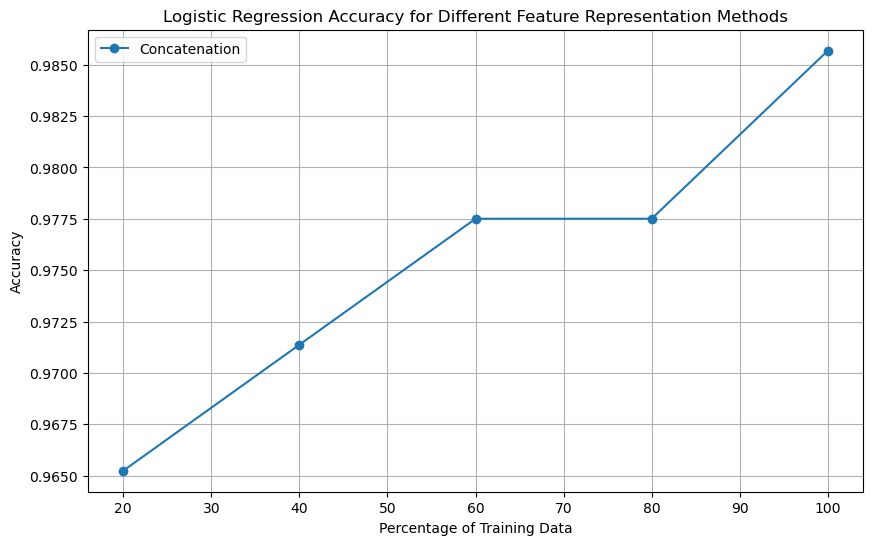

In [10]:
plt.figure(figsize=(10, 6))
plt.plot([p * 100 for p in percentages], accuracies_concat, label="Concatenation", marker='o')

plt.xlabel("Percentage of Training Data")
plt.ylabel("Accuracy")
plt.title("Logistic Regression Accuracy for Different Feature Representation Methods")
plt.legend()
plt.grid(True)
plt.show()